In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
path = 'C:/Users/khoat/OneDrive - National Economics University/Desktop/1. Study/3.1. Data Preparation & Visualiazation/data/'

In [4]:
wine = pd.read_csv(path + 'winequality-red.csv')

In [36]:
wine.info()
wine.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


<AxesSubplot:>

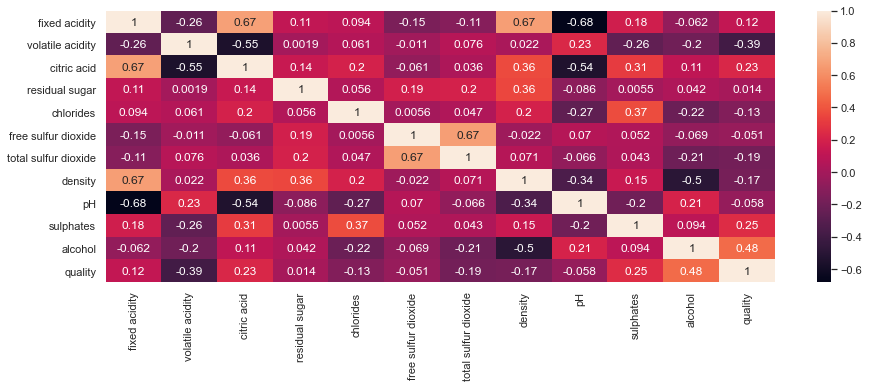

In [43]:
plt.figure(figsize=(15,5))
sns.heatmap(wine.corr(),annot=True)

In [92]:
X = wine.drop(['quality'],axis=1)
y = wine['quality']

In [93]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [94]:
from sklearn.linear_model import LinearRegression
# Fit the model
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [95]:
lm.coef_

array([ 2.30853339e-02, -1.00130443e+00, -1.40821461e-01,  6.56431104e-03,
       -1.80650315e+00,  5.62733439e-03, -3.64444893e-03, -1.03515936e+01,
       -3.93687732e-01,  8.41171623e-01,  2.81889567e-01])

In [106]:
train_pred = lm.predict(X_train)
test_pred = lm.predict(X_test)

In [107]:
from sklearn import metrics
print('Train set:')
print('MAE:', metrics.mean_absolute_error(y_train, train_pred))
print('MSE:', metrics.mean_squared_error(y_train, train_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, train_pred)))

Train set:
MAE: 0.49961964114857954
MSE: 0.4241911573139901
RMSE: 0.6512995910592836


In [108]:
print('Test set:')
print('MAE:', metrics.mean_absolute_error(y_test, test_pred))
print('MSE:', metrics.mean_squared_error(y_test, test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, test_pred)))

Test set:
MAE: 0.5035304415524375
MSE: 0.3900251439639542
RMSE: 0.6245199307980124


SVR

In [112]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [154]:
regr = make_pipeline(StandardScaler(), SVR(kernel='rbf',C=1.0, epsilon=0.3))
regr.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svr', SVR(epsilon=0.3))])

In [155]:
svr_test_pred = regr.predict(X_test)

In [156]:
print('Test set:')
print('MAE:', metrics.mean_absolute_error(y_test, svr_test_pred))
print('MSE:', metrics.mean_squared_error(y_test, svr_test_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, svr_test_pred)))

Test set:
MAE: 0.4784392679766043
MSE: 0.34512513723095933
RMSE: 0.5874735204508875
